In [1]:
import pandas as pd

data = pd.read_csv('data_sample_three_years.csv')

data = data.iloc[:, [0,1,2,3,4]]
data.rename(columns={'date': 'open', 'low':'close', 'open':'high', 'high':'low'}, inplace=True)

data['date'] = pd.to_datetime(data['timestamp'], unit='s')
data = data.iloc[:, [0,5,1,2,3,4]]

data_backup = data.loc[ data.timestamp >= 1675814400 ]
data = data.loc[ data.timestamp < 1675814400 ]

from talib import RSI
data['rsi'] = RSI(data['close'])

from talib import MA, SMA, EMA
data['ma'] = MA(data['close'])

## Gradient Boosting test: 10 previous bar

In [2]:
for i in range(1,11):
    data[f'close+{i}'] = data['close'].shift(i)
data.dropna(axis=0, inplace=True)

In [3]:
data

timestamp                date     open     high      low    close  \
29     1612879200 2021-02-09 14:00:00  1743.07  1760.89  1735.27  1760.23   
30     1612882800 2021-02-09 15:00:00  1760.23  1761.00  1743.88  1751.09   
31     1612886400 2021-02-09 16:00:00  1751.10  1765.00  1721.93  1736.78   
32     1612890000 2021-02-09 17:00:00  1736.66  1751.13  1734.10  1744.33   
33     1612893600 2021-02-09 18:00:00  1744.34  1761.43  1739.39  1754.75   
...           ...                 ...      ...      ...      ...      ...   
16257  1675792800 2023-02-07 18:00:00  1672.03  1679.03  1625.48  1638.52   
16258  1675796400 2023-02-07 19:00:00  1638.52  1658.48  1637.64  1656.42   
16259  1675800000 2023-02-07 20:00:00  1656.43  1668.77  1650.16  1664.93   
16260  1675803600 2023-02-07 21:00:00  1664.86  1674.72  1663.76  1667.43   
16261  1675807200 2023-02-07 22:00:00  1667.42  1671.74  1657.07  1664.66   

             rsi           ma  close+1  close+2  close+3  close+4  close+5  \
29     60.726497  1710.117667  1743.08  1733.79  1758.51  1738.22  1779.43   
30     58.774198  1715.234333  1760.23  1743.08  1733.79  1758.51  1738.22   
31     55.752107  1720.006667  1751.09  1760.23  1743.08  1733.79  1758.51   
32     57.008134  1725.372667  1736.78  1751.09  1760.23  1743.08  1733.79   
33     58.748543  1729.864333  1744.33  1736.78  1751.09  1760.23  1743.08   
...          ...          ...      ...      ...      ...      ...      ...   
16257  51.870094  1633.974000  1637.98  1638.67  1640.39  1642.03  1641.25   
16258  63.059562  1634.561333  1638.52  1637.98  1638.67  1640.39  1642.03   
16259  66.988870  1635.701000  1656.42  1638.52  1637.98  1638.67  1640.39   
16260  68.063590  1637.200000  1664.93  1656.42  1638.52  1637.98  1638.67   
16261  65.518386  1638.470333  1667.43  1664.93  1656.42  1638.52  1637.98   

       close+6  close+7  close+8  close+9  close+10  
29     1754.21  1774.64  1746.64  1740.96   1728.18  
30     1779.43  1754.21  1774.64  1746.64   1740.96  
31     1738.22  1779.43  1754.21  1774.64   1746.64  
32     1758.51  1738.22  1779.43  1754.21   1774.64  
33     1733.79  1758.51  1738.22  1779.43   1754.21  
...        ...      ...      ...      ...       ...  
16257  1629.80  1634.25  1631.08  1632.86   1629.10  
16258  1641.25  1629.80  1634.25  1631.08   1632.86  
16259  1642.03  1641.25  1629.80  1634.25   1631.08  
16260  1640.39  1642.03  1641.25  1629.80   1634.25  
16261  1638.67  1640.39  1642.03  1641.25   1629.80  

[16233 rows x 18 columns]

In [4]:
inputs = data.iloc[:, [8,9,10,11,12,13,14,15,16,17]]
target = data.iloc[:, [5]]

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=1, shuffle=False)

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import xgboost

2024-02-26 11:06:16.609955: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 11:06:16.702025: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 11:06:16.702137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 11:06:16.705690: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 11:06:16.720257: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 11:06:18.396316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [7]:
model = xgboost.XGBRegressor()

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
pred = model.predict(X_test)

In [9]:
y_test['pred'] = pred

In [10]:
y_test

close         pred
13015  1757.69  1769.948364
13016  1731.25  1756.564575
13017  1744.47  1742.895752
13018  1765.01  1745.911743
13019  1735.29  1769.948364
...        ...          ...
16257  1638.52  1648.033813
16258  1656.42  1648.033813
16259  1664.93  1650.819702
16260  1667.43  1672.422852
16261  1664.66  1672.422852

[3247 rows x 2 columns]

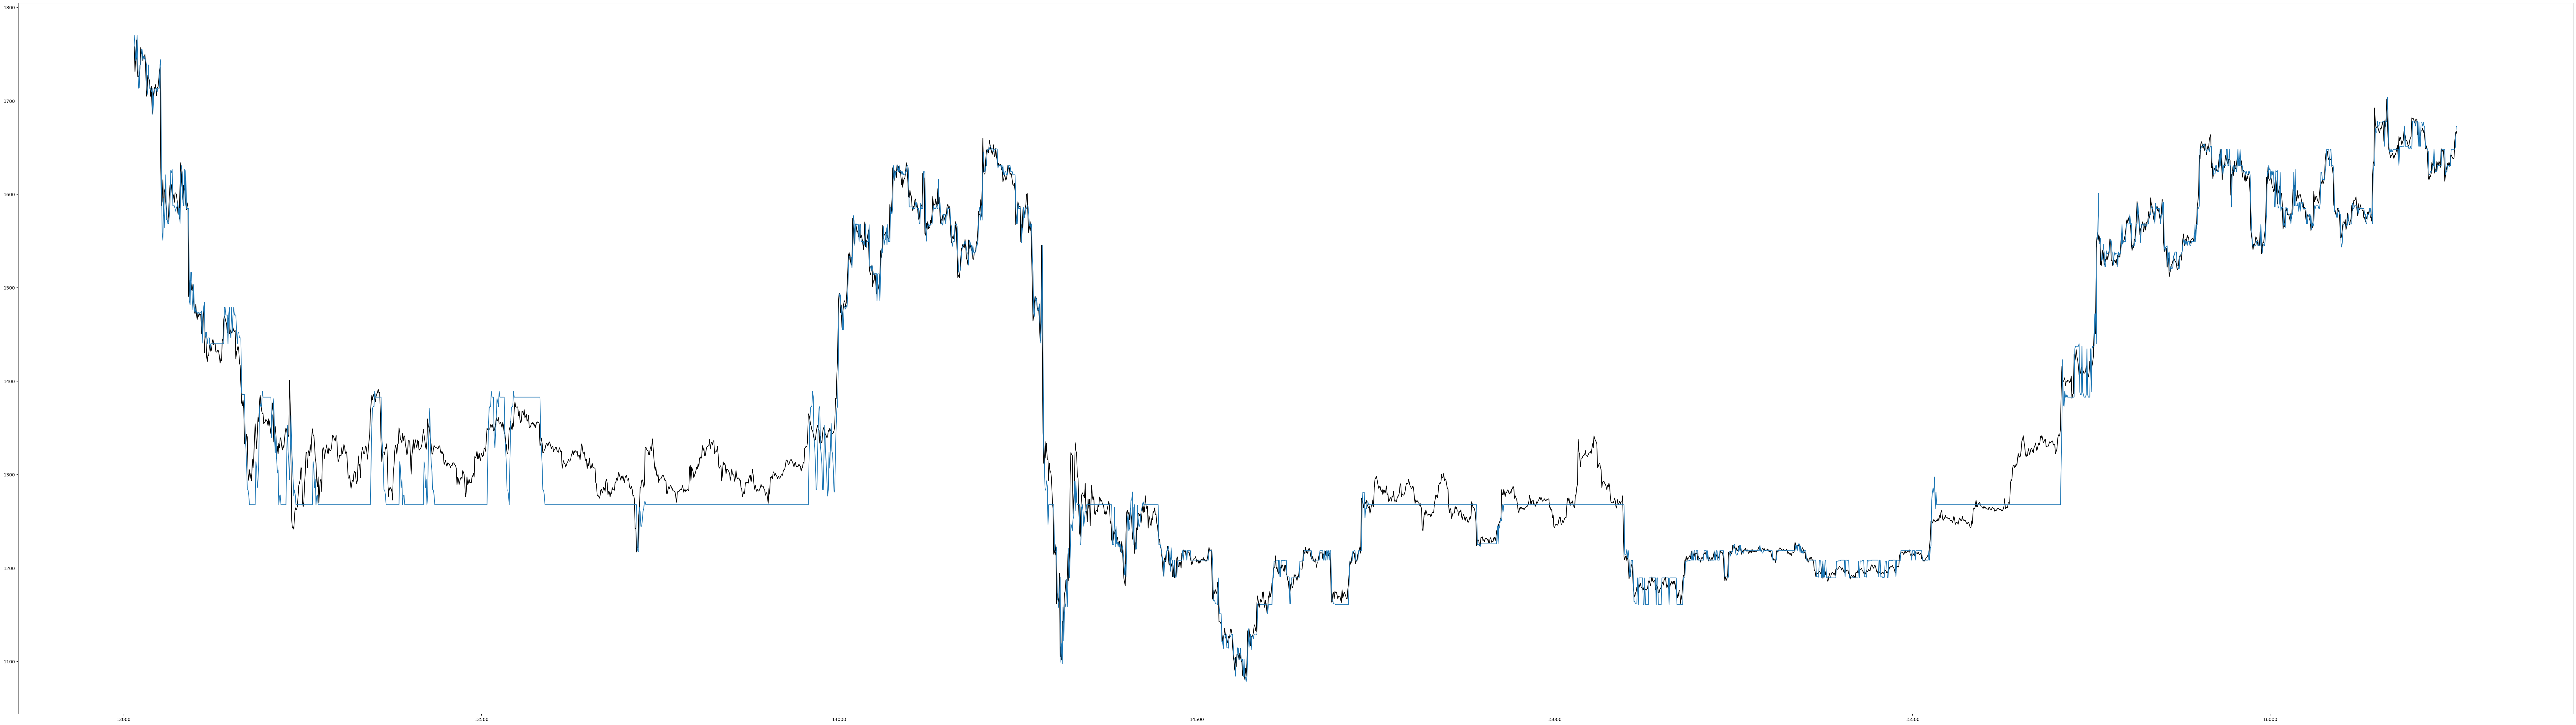

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(y_test['close'], color='black')
plt.plot(y_test['pred'])

## Gradient Boosting test - 10 bars later

In [12]:
import pandas as pd

data2 = pd.read_csv('data_sample_three_years.csv')

data2 = data2.iloc[:, [0,1,2,3,4]]
data2.rename(columns={'date': 'open', 'low':'close', 'open':'high', 'high':'low'}, inplace=True)

data2['date'] = pd.to_datetime(data2['timestamp'], unit='s')
data2 = data2.iloc[:, [0,5,1,2,3,4]]

data_backup2 = data2.loc[ data2.timestamp >= 1675814400 ]
data2 = data.loc[ data2.timestamp < 1675814400 ]

from talib import RSI
data2['rsi'] = RSI(data2['close'])

from talib import MA, SMA, EMA
data2['ma'] = MA(data2['close'])

In [13]:
#data2['close+'] = data2['close'].shift(-10)
for i in range(1,11):
    data2[f'close+{i}'] = data2['close'].shift(-i) # future prices
data2['close+11'] = data2['close'].shift(-11)

In [14]:
data2.dropna(axis=0, inplace=True)

In [15]:
data2

timestamp                date     open     high      low    close  \
58     1613016000 2021-02-11 04:00:00  1745.84  1751.04  1722.00  1725.28   
59     1613023200 2021-02-11 06:00:00  1720.31  1735.52  1720.31  1728.28   
60     1613026800 2021-02-11 07:00:00  1728.27  1750.19  1728.27  1739.57   
61     1613030400 2021-02-11 08:00:00  1739.47  1756.99  1732.87  1754.61   
62     1613034000 2021-02-11 09:00:00  1754.75  1771.83  1745.70  1768.61   
...           ...                 ...      ...      ...      ...      ...   
16246  1675731600 2023-02-07 01:00:00  1619.85  1626.64  1619.44  1625.53   
16247  1675735200 2023-02-07 02:00:00  1625.53  1629.89  1620.95  1629.10   
16248  1675738800 2023-02-07 03:00:00  1629.11  1635.00  1626.06  1632.86   
16249  1675742400 2023-02-07 04:00:00  1632.86  1637.50  1630.30  1631.08   
16250  1675746000 2023-02-07 05:00:00  1631.07  1636.35  1630.89  1634.25   

             rsi           ma  close+1  close+2  close+3  close+4  close+5  \
58     45.521105  1758.575000  1728.28  1739.57  1754.61  1768.61  1787.95   
59     46.330757  1757.510000  1739.57  1754.61  1768.61  1787.95  1766.95   
60     49.379721  1757.126000  1754.61  1768.61  1787.95  1766.95  1783.16   
61     53.194442  1757.720333  1768.61  1787.95  1766.95  1783.16  1794.33   
62     56.481990  1758.529667  1787.95  1766.95  1783.16  1794.33  1800.90   
...          ...          ...      ...      ...      ...      ...      ...   
16246  44.155027  1632.240000  1629.10  1632.86  1631.08  1634.25  1629.80   
16247  46.338080  1631.598667  1632.86  1631.08  1634.25  1629.80  1641.25   
16248  48.616372  1631.074667  1631.08  1634.25  1629.80  1641.25  1642.03   
16249  47.586360  1630.381667  1634.25  1629.80  1641.25  1642.03  1640.39   
16250  49.632948  1630.217333  1629.80  1641.25  1642.03  1640.39  1638.67   

       close+6  close+7  close+8  close+9  close+10  close+11  
58     1766.95  1783.16  1794.33  1800.90   1800.69   1795.23  
59     1783.16  1794.33  1800.90  1800.69   1795.23   1799.00  
60     1794.33  1800.90  1800.69  1795.23   1799.00   1794.77  
61     1800.90  1800.69  1795.23  1799.00   1794.77   1763.63  
62     1800.69  1795.23  1799.00  1794.77   1763.63   1769.82  
...        ...      ...      ...      ...       ...       ...  
16246  1641.25  1642.03  1640.39  1638.67   1637.98   1638.52  
16247  1642.03  1640.39  1638.67  1637.98   1638.52   1656.42  
16248  1640.39  1638.67  1637.98  1638.52   1656.42   1664.93  
16249  1638.67  1637.98  1638.52  1656.42   1664.93   1667.43  
16250  1637.98  1638.52  1656.42  1664.93   1667.43   1664.66  

[16193 rows x 19 columns]

In [16]:
inputs2 = data2.iloc[:, [5,8,9,10,11,12,13,14,15,16,17]]
target2 = data2.iloc[:, [18]]

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs2, target2, test_size=0.2, random_state=1, shuffle=False)

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import xgboost

In [19]:
model2 = xgboost.XGBRegressor()

model2.fit(X_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
pred2 = model2.predict(X_test2)

In [21]:
y_test2['pred'] = pred2

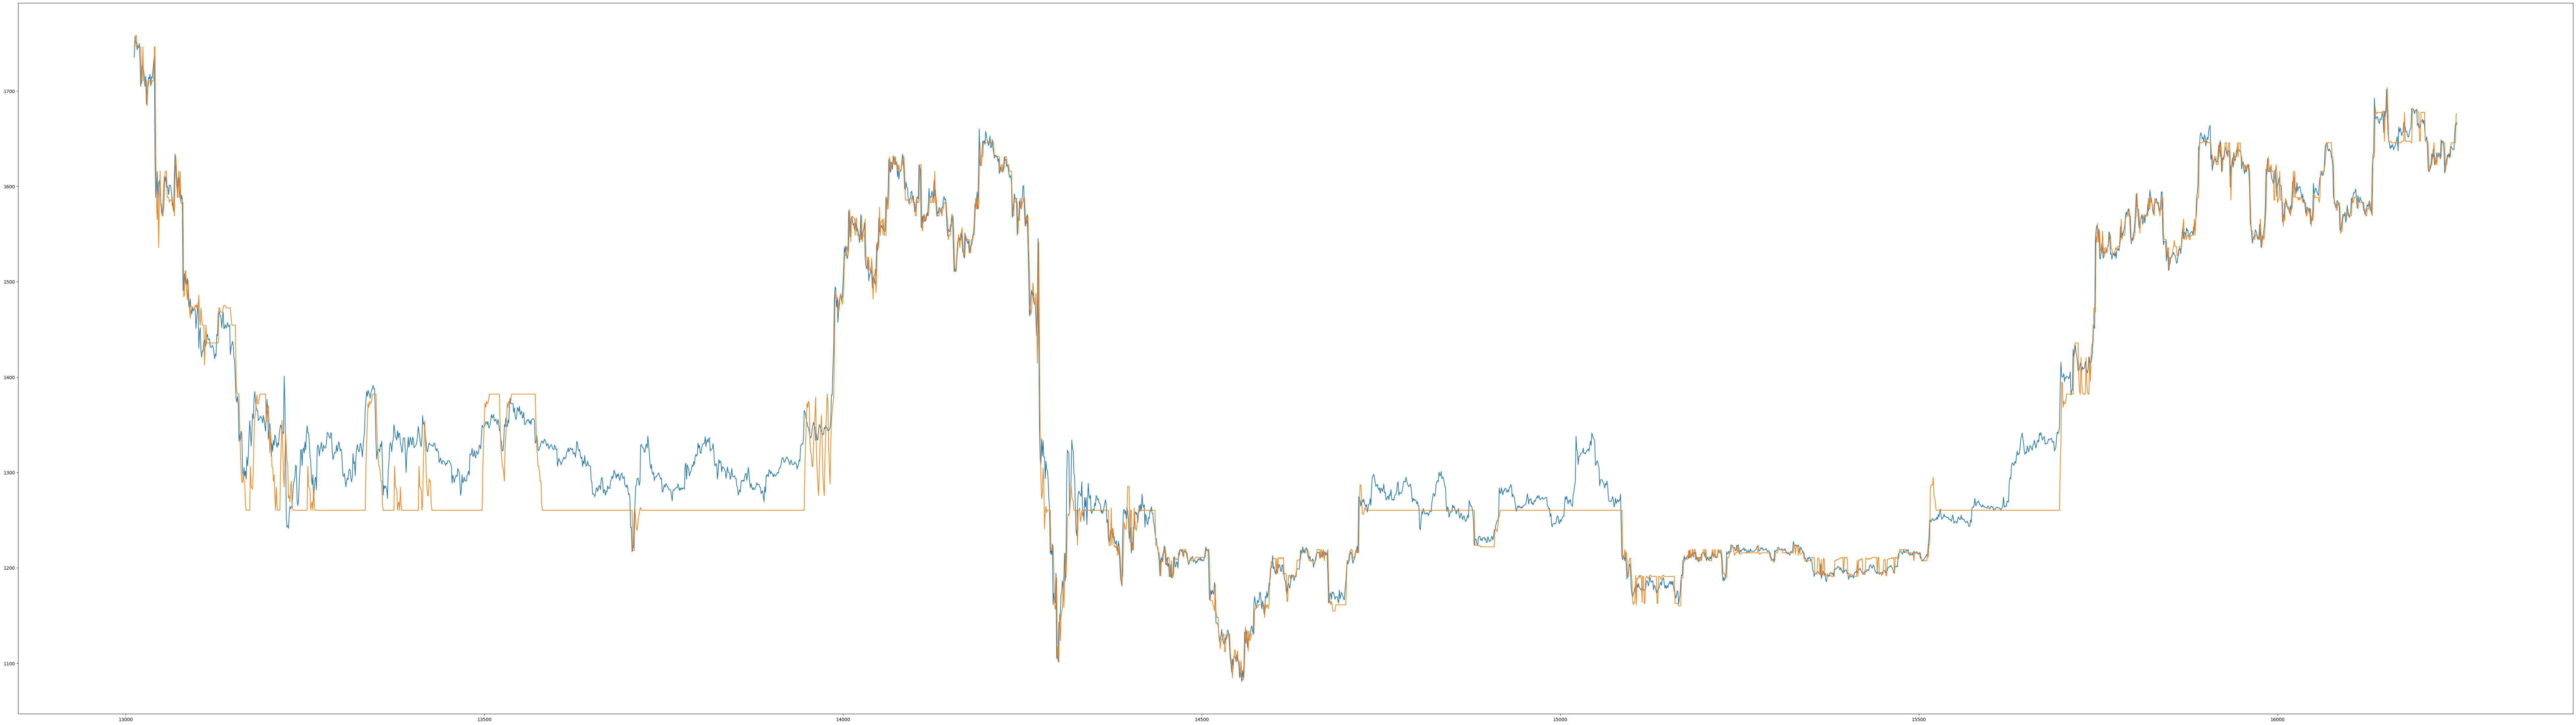

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(y_test2['close+11'])
plt.plot(y_test2['pred'])

## Neural Network test: 10 bars ahead

In [23]:
import pandas as pd

data3 = pd.read_csv('data_sample_three_years.csv')

data3 = data3.iloc[:, [0,1,2,3,4]]
data3.rename(columns={'date': 'open', 'low':'close', 'open':'high', 'high':'low'}, inplace=True)

data3['date'] = pd.to_datetime(data3['timestamp'], unit='s')
data3 = data3.iloc[:, [0,5,1,2,3,4]]

data_backup3 = data3.loc[ data3.timestamp >= 1675814400 ]
data3 = data3.loc[ data3.timestamp < 1675814400 ]

from talib import RSI
data3['rsi'] = RSI(data3['close'])

from talib import MA, SMA, EMA
data3['ma'] = MA(data3['close'])

In [24]:
#data3['close+'] = data3['close'].shift(-10)
for i in range(1,11):
    data3[f'close+{i}'] = data3['close'].shift(-i) # future prices
data3['close+11'] = data3['close'].shift(-11)

In [25]:
data3.dropna(axis=0, inplace=True)

In [26]:
data3

timestamp                date     open     high      low    close  \
29     1612879200 2021-02-09 14:00:00  1743.07  1760.89  1735.27  1760.23   
30     1612882800 2021-02-09 15:00:00  1760.23  1761.00  1743.88  1751.09   
31     1612886400 2021-02-09 16:00:00  1751.10  1765.00  1721.93  1736.78   
32     1612890000 2021-02-09 17:00:00  1736.66  1751.13  1734.10  1744.33   
33     1612893600 2021-02-09 18:00:00  1744.34  1761.43  1739.39  1754.75   
...           ...                 ...      ...      ...      ...      ...   
16246  1675731600 2023-02-07 01:00:00  1619.85  1626.64  1619.44  1625.53   
16247  1675735200 2023-02-07 02:00:00  1625.53  1629.89  1620.95  1629.10   
16248  1675738800 2023-02-07 03:00:00  1629.11  1635.00  1626.06  1632.86   
16249  1675742400 2023-02-07 04:00:00  1632.86  1637.50  1630.30  1631.08   
16250  1675746000 2023-02-07 05:00:00  1631.07  1636.35  1630.89  1634.25   

             rsi           ma  close+1  close+2  close+3  close+4  close+5  \
29     60.726497  1710.117667  1751.09  1736.78  1744.33  1754.75  1770.48   
30     58.774198  1715.234333  1736.78  1744.33  1754.75  1770.48  1767.11   
31     55.752107  1720.006667  1744.33  1754.75  1770.48  1767.11  1770.79   
32     57.008134  1725.372667  1754.75  1770.48  1767.11  1770.79  1809.37   
33     58.748543  1729.864333  1770.48  1767.11  1770.79  1809.37  1814.81   
...          ...          ...      ...      ...      ...      ...      ...   
16246  44.155027  1632.240000  1629.10  1632.86  1631.08  1634.25  1629.80   
16247  46.338080  1631.598667  1632.86  1631.08  1634.25  1629.80  1641.25   
16248  48.616372  1631.074667  1631.08  1634.25  1629.80  1641.25  1642.03   
16249  47.586360  1630.381667  1634.25  1629.80  1641.25  1642.03  1640.39   
16250  49.632948  1630.217333  1629.80  1641.25  1642.03  1640.39  1638.67   

       close+6  close+7  close+8  close+9  close+10  close+11  
29     1767.11  1770.79  1809.37  1814.81   1815.08   1801.76  
30     1770.79  1809.37  1814.81  1815.08   1801.76   1806.96  
31     1809.37  1814.81  1815.08  1801.76   1806.96   1816.73  
32     1814.81  1815.08  1801.76  1806.96   1816.73   1810.23  
33     1815.08  1801.76  1806.96  1816.73   1810.23   1798.95  
...        ...      ...      ...      ...       ...       ...  
16246  1641.25  1642.03  1640.39  1638.67   1637.98   1638.52  
16247  1642.03  1640.39  1638.67  1637.98   1638.52   1656.42  
16248  1640.39  1638.67  1637.98  1638.52   1656.42   1664.93  
16249  1638.67  1637.98  1638.52  1656.42   1664.93   1667.43  
16250  1637.98  1638.52  1656.42  1664.93   1667.43   1664.66  

[16222 rows x 19 columns]

In [27]:
inputs3 = data3.iloc[:, [5,8,9,10,11,12,13,14,15,16,17]]
target3 = data3.iloc[:, [18]]

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

X_train3, X_test3, y_train3, y_test3 = train_test_split(inputs3, target3, test_size=0.2, random_state=1, shuffle=False)

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import xgboost

In [30]:
X_train3.shape

(12977, 11)

In [31]:
X_train_reshaped = np.reshape(X_train3.values, (X_train3.shape[0], X_train3.shape[1], 1))
X_test_reshaped = np.reshape(X_test3.values, (X_test3.shape[0], X_test3.shape[1], 1))

In [32]:
# Define and train the LSTM model
model3 = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer with 10 features
    Dense(64, activation='relu'),                     # Hidden layer with 64 units
    Dense(1)                                          # Output layer with 1 unit for regression
])

# Compile the model
model3.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss for regression

# Train the model
model3.fit(X_train3, y_train3, epochs=100, batch_size=32)

Epoch 1/100
406/406 [==============================] - 2s 2ms/step - loss: 26552.7129
Epoch 2/100
406/406 [==============================] - 1s 2ms/step - loss: 2127.9622
Epoch 3/100
406/406 [==============================] - 1s 3ms/step - loss: 1783.8590
Epoch 4/100
406/406 [==============================] - 1s 2ms/step - loss: 1519.8390
Epoch 5/100
406/406 [==============================] - 1s 2ms/step - loss: 1463.7645
Epoch 6/100
406/406 [==============================] - 1s 2ms/step - loss: 1300.1978
Epoch 7/100
406/406 [==============================] - 1s 3ms/step - loss: 1266.1940
Epoch 8/100
406/406 [==============================] - 1s 2ms/step - loss: 1284.8651
Epoch 9/100
406/406 [==============================] - 1s 2ms/step - loss: 1230.5602
Epoch 10/100
406/406 [==============================] - 1s 2ms/step - loss: 1240.0665
Epoch 11/100
406/406 [==============================] - 1s 2ms/step - loss: 1210.9594
Epoch 12/100
406/406 [==============================] - 1s 2ms

In [33]:
pred3 = model3.predict(X_test3)

102/102 [==============================] - 0s 2ms/step


In [34]:
y_test3['pred'] = pred3.reshape(1,-1)[0]

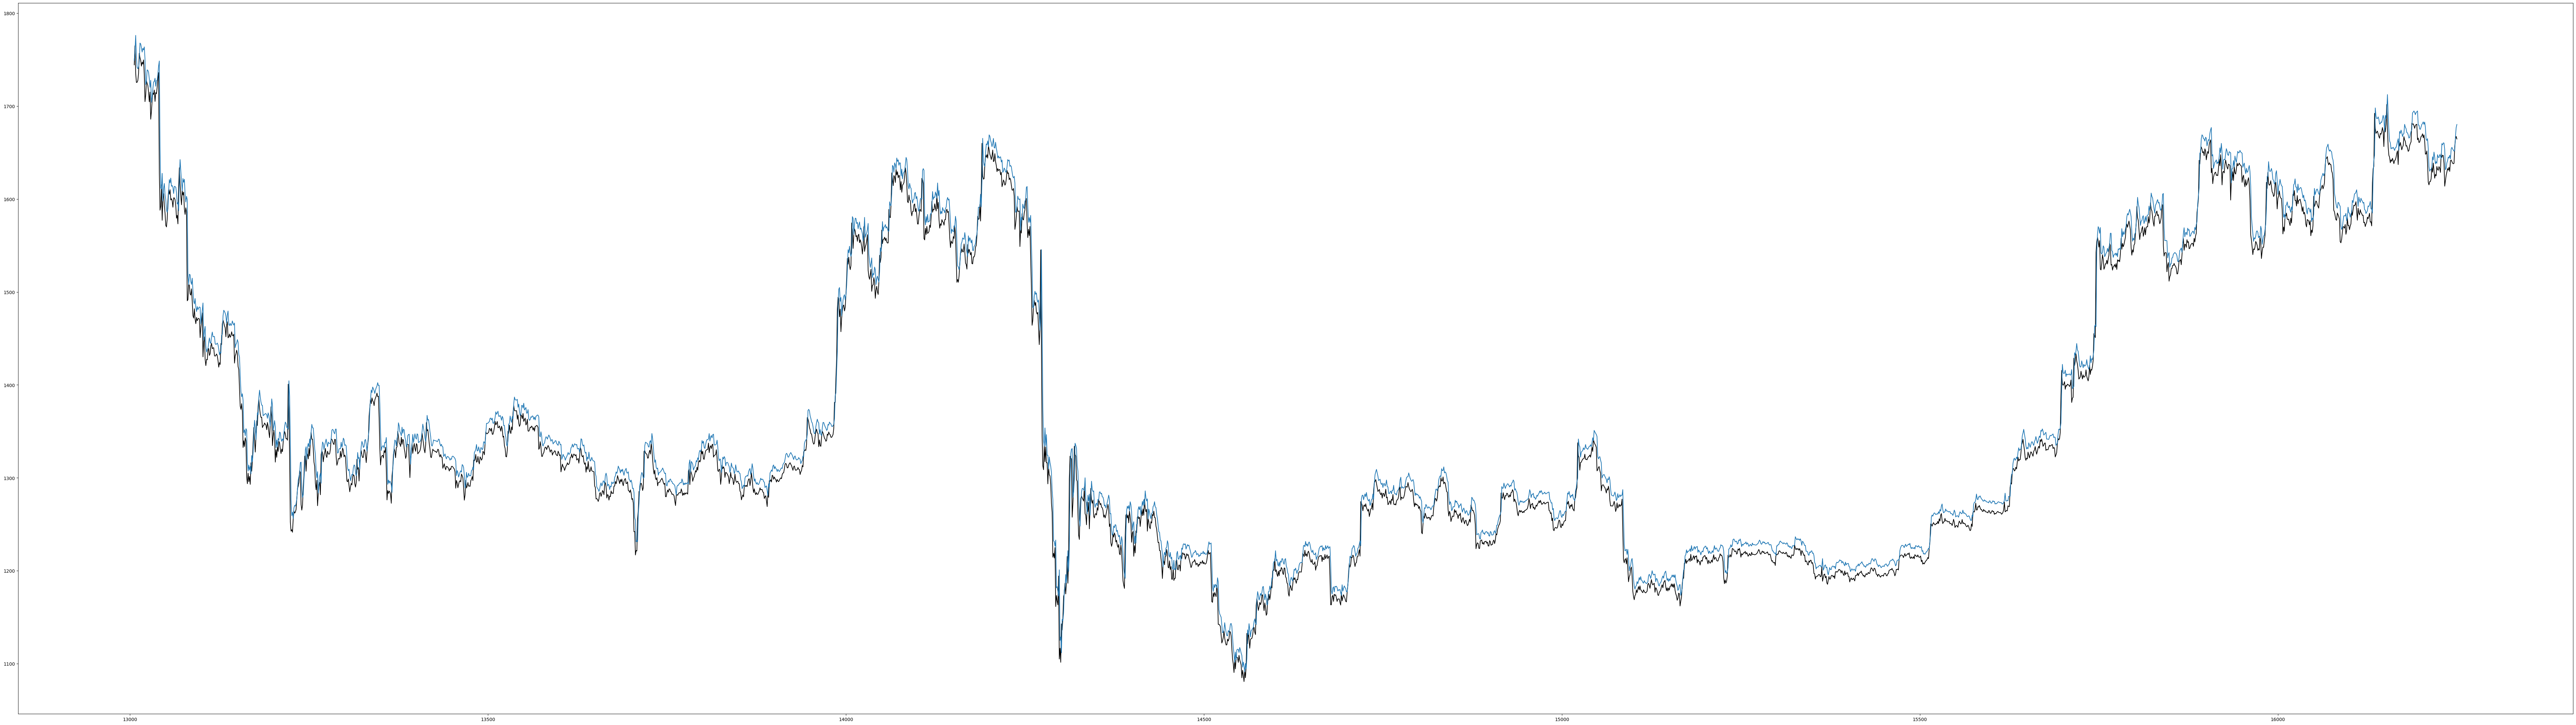

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(y_test3['close+11'], color='black')
plt.plot(y_test3['pred'])

## neural network test: 10 previous bar

In [36]:
import pandas as pd

data4 = pd.read_csv('data_sample_three_years.csv')

data4 = data4.iloc[:, [0,1,2,3,4]]
data4.rename(columns={'date': 'open', 'low':'close', 'open':'high', 'high':'low'}, inplace=True)

data4['date'] = pd.to_datetime(data4['timestamp'], unit='s')
data4 = data4.iloc[:, [0,5,1,2,3,4]]

data_backup4 = data4.loc[ data4.timestamp >= 1675814400 ]
data4 = data4.loc[ data4.timestamp < 1675814400 ]

from talib import RSI
data4['rsi'] = RSI(data4['close'])

from talib import MA, SMA, EMA
data4['ma'] = MA(data4['close'])

In [37]:
for i in range(1,11):
    data4[f'close+{i}'] = data4['close'].shift(i)
data4.dropna(axis=0, inplace=True)

In [38]:
inputs4 = data4.iloc[:, [8,9,10,11,12,13,14,15,16,17]]
target4 = data4.iloc[:, [5]]

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

X_train4, X_test4, y_train4, y_test4 = train_test_split(inputs4, target4, test_size=0.2, random_state=1, shuffle=False)

In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import xgboost

In [41]:
X_train4.shape

(12986, 10)

In [42]:
# Define and train the LSTM model
model4 = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),  # Input layer with 10 features
    Dense(64, activation='relu'),                     # Hidden layer with 64 units
    Dense(1)                                          # Output layer with 1 unit for regression
])

# Compile the model
model4.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss for regression

# Train the model
model4.fit(X_train4, y_train4, epochs=100, batch_size=32)

Epoch 1/100
406/406 [==============================] - 2s 3ms/step - loss: 16299.6064
Epoch 2/100
406/406 [==============================] - 1s 3ms/step - loss: 4018.4353
Epoch 3/100
406/406 [==============================] - 1s 2ms/step - loss: 3777.8501
Epoch 4/100
406/406 [==============================] - 1s 3ms/step - loss: 3334.0034
Epoch 5/100
406/406 [==============================] - 1s 3ms/step - loss: 2681.6306
Epoch 6/100
406/406 [==============================] - 1s 3ms/step - loss: 2484.7244
Epoch 7/100
406/406 [==============================] - 2s 4ms/step - loss: 2041.8400
Epoch 8/100
406/406 [==============================] - 1s 3ms/step - loss: 2008.1107
Epoch 9/100
406/406 [==============================] - 1s 3ms/step - loss: 1611.6947
Epoch 10/100
406/406 [==============================] - 1s 3ms/step - loss: 1602.5092
Epoch 11/100
406/406 [==============================] - 1s 4ms/step - loss: 1484.7220
Epoch 12/100
406/406 [==============================] - 1s 3ms

In [43]:
pred4 = model4.predict(X_test4)

102/102 [==============================] - 0s 2ms/step


In [44]:
y_test4['pred'] = pred4.reshape(1,-1)[0]

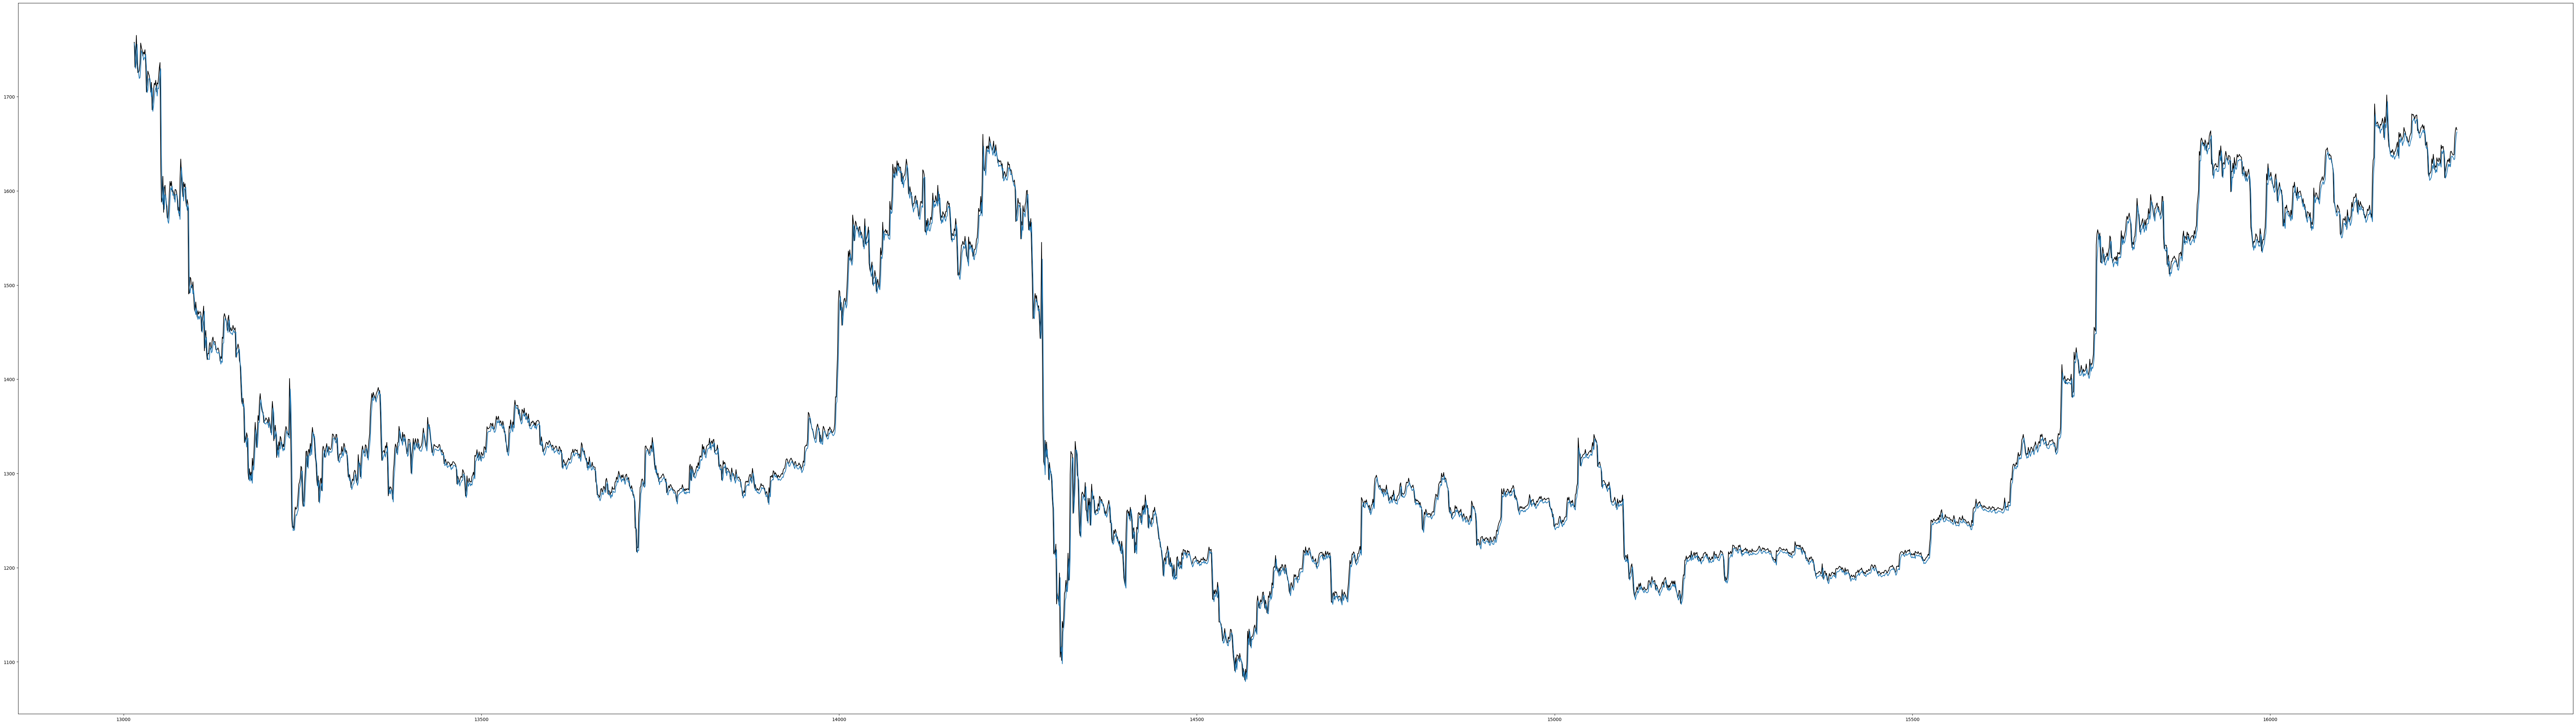

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(y_test4['close'], color='black')
plt.plot(y_test4['pred'])
plt.savefig('test4.png')

## highs & lows neural network test:

In [46]:
import pandas as pd

data5 = pd.read_csv('data_sample_three_years.csv')

data5 = data5.iloc[:, [0,1,2,3,4]]
data5.rename(columns={'date': 'open', 'low':'close', 'open':'high', 'high':'low'}, inplace=True)

data5['date'] = pd.to_datetime(data5['timestamp'], unit='s')
data5 = data5.iloc[:, [0,5,1,2,3,4]]

data_backup5 = data5.loc[ data5.timestamp >= 1675814400 ]
data5 = data5.loc[ data5.timestamp < 1675814400 ]

for i in range(1,11):
    data5[f'high+{i}'] = data5['high'].shift(i)
for i in range(1,11):
    data5[f'low+{i}'] = data5['low'].shift(i)
data5.dropna(axis=0, inplace=True)

inputs_highs5 = data5.iloc[:, [6,7,8,9,10,11,12,13,14,15]]
target_highs5 = data5.iloc[:, [3]]

inputs_lows5 = data5.iloc[:, [16,17,18,19,20,21,22,23,24,25]]
target_lows5 = data5.iloc[:, [4]]

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

X_train_h5, X_test_h5, y_train_h5, y_test_h5 = train_test_split(inputs_highs5, target_highs5, test_size=0.2, random_state=1, shuffle=False)
X_train_l5, X_test_l5, y_train_l5, y_test_l5 = train_test_split(inputs_lows5, target_lows5, test_size=0.2, random_state=1, shuffle=False)

In [48]:
# Define and train the LSTM model
model_h5 = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),  # Input layer with 10 features
    Dense(64, activation='relu'),                     # Hidden layer with 64 units
    Dense(1)                                          # Output layer with 1 unit for regression
])

# Compile the model
model_h5.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss for regression

# Train the model
model_h5.fit(X_train_h5, y_train_h5, epochs=100, batch_size=32)

Epoch 1/100
407/407 [==============================] - 2s 3ms/step - loss: 95681.2969
Epoch 2/100
407/407 [==============================] - 1s 2ms/step - loss: 1755.3022
Epoch 3/100
407/407 [==============================] - 1s 3ms/step - loss: 1713.0663
Epoch 4/100
407/407 [==============================] - 1s 3ms/step - loss: 1610.4424
Epoch 5/100
407/407 [==============================] - 1s 2ms/step - loss: 1527.4113
Epoch 6/100
407/407 [==============================] - 1s 2ms/step - loss: 1470.6312
Epoch 7/100
407/407 [==============================] - 1s 2ms/step - loss: 1343.4717
Epoch 8/100
407/407 [==============================] - 1s 2ms/step - loss: 1277.2083
Epoch 9/100
407/407 [==============================] - 1s 3ms/step - loss: 1241.4672
Epoch 10/100
407/407 [==============================] - 1s 3ms/step - loss: 1134.6560
Epoch 11/100
407/407 [==============================] - 1s 3ms/step - loss: 1205.1896
Epoch 12/100
407/407 [==============================] - 1s 2ms

In [49]:
# Define and train the LSTM model
model_l5 = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),  # Input layer with 10 features
    Dense(64, activation='relu'),                     # Hidden layer with 64 units
    Dense(1)                                          # Output layer with 1 unit for regression
])

# Compile the model
model_l5.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss for regression

# Train the model
model_l5.fit(X_train_l5, y_train_l5, epochs=100, batch_size=32)

Epoch 1/100
407/407 [==============================] - 2s 2ms/step - loss: 108815.1016
Epoch 2/100
407/407 [==============================] - 1s 3ms/step - loss: 2668.0046
Epoch 3/100
407/407 [==============================] - 1s 3ms/step - loss: 2425.1343
Epoch 4/100
407/407 [==============================] - 1s 2ms/step - loss: 2143.7036
Epoch 5/100
407/407 [==============================] - 1s 3ms/step - loss: 1891.7026
Epoch 6/100
407/407 [==============================] - 1s 2ms/step - loss: 1807.4613
Epoch 7/100
407/407 [==============================] - 1s 3ms/step - loss: 1634.9323
Epoch 8/100
407/407 [==============================] - 1s 3ms/step - loss: 1641.3975
Epoch 9/100
407/407 [==============================] - 1s 2ms/step - loss: 1647.2823
Epoch 10/100
407/407 [==============================] - 2s 4ms/step - loss: 1507.0250
Epoch 11/100
407/407 [==============================] - 1s 2ms/step - loss: 1715.4506
Epoch 12/100
407/407 [==============================] - 1s 2m

In [50]:
pred_highs5 = model_h5.predict(X_test_h5)
y_test_h5['pred'] = pred_highs5

pred_lows5 = model_l5.predict(X_test_l5)
y_test_l5['pred'] = pred_lows5

102/102 [==============================] - 0s 2ms/step


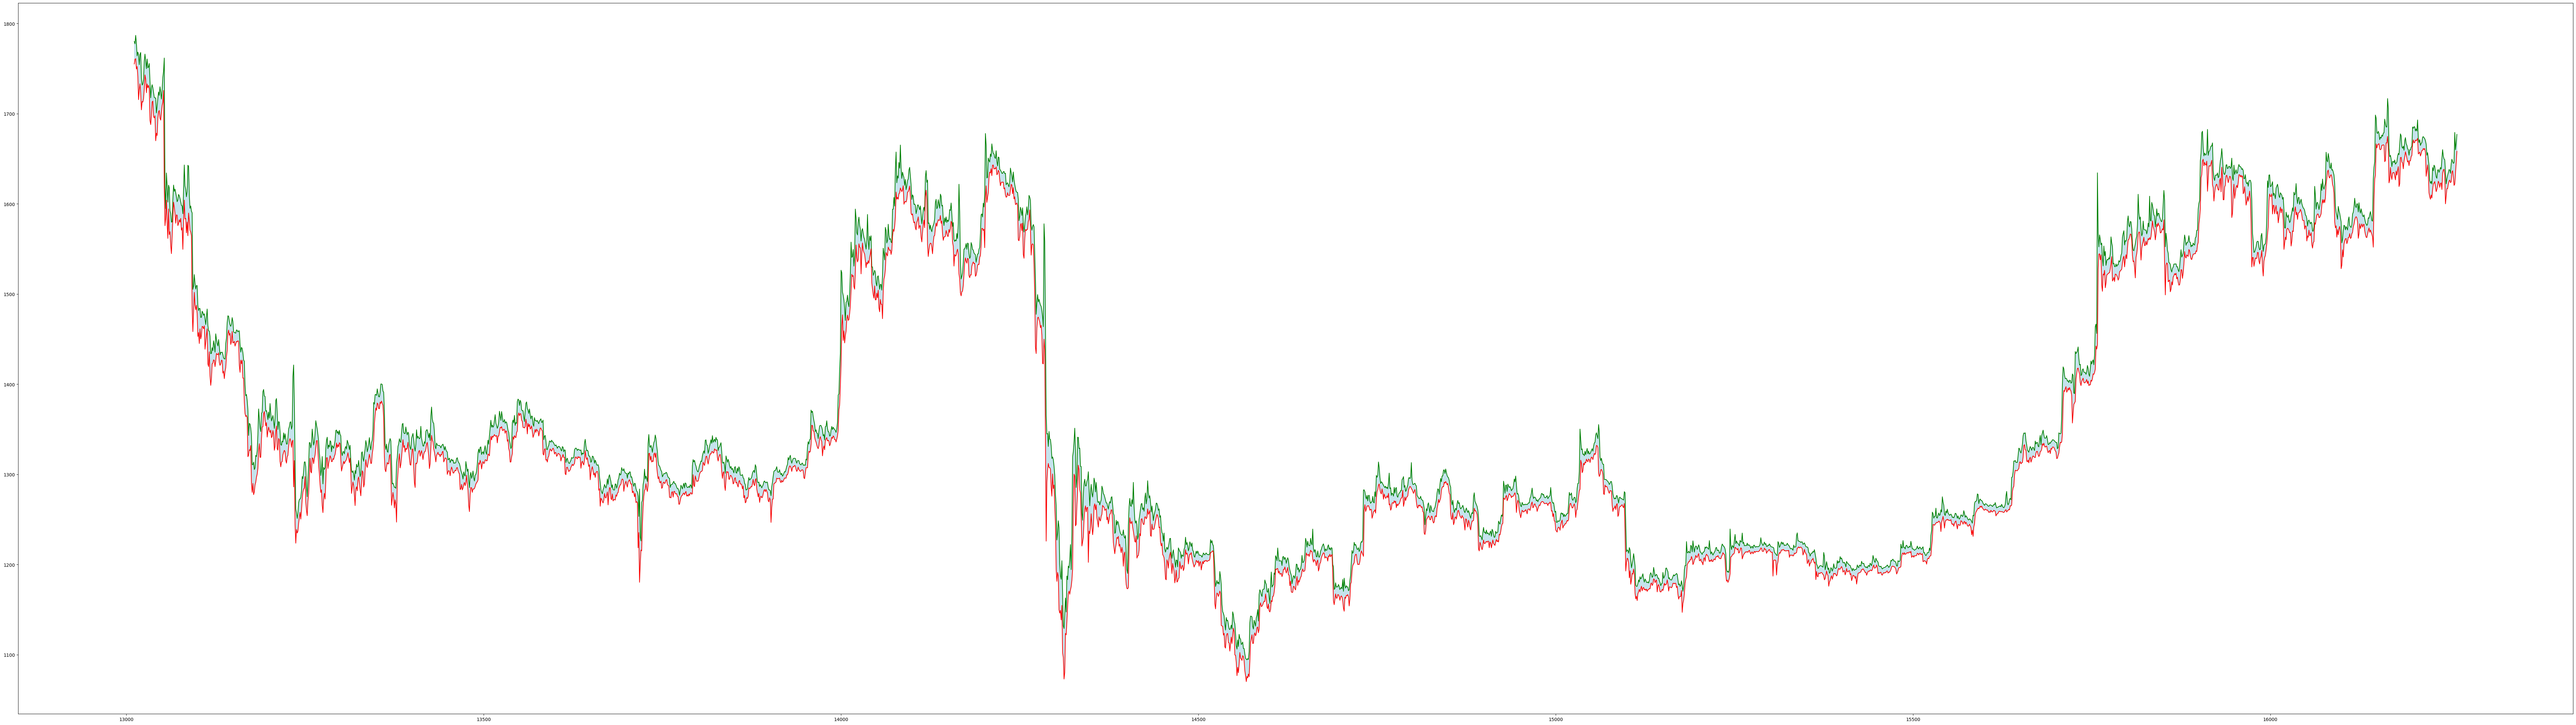

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

x5 = y_test_h5.index

plt.plot(y_test_h5['pred'], color='green')
plt.plot(y_test_l5['pred'], color='red')
plt.fill_between(x5, y_test_h5['pred'], y_test_l5['pred'], color='lightblue', alpha=0.7)
plt.show()

## with backup data

In [52]:
for i in range(1,11):
    data_backup5[f'high+{i}'] = data_backup5['high'].shift(i)
for i in range(1,11):
    data_backup5[f'low+{i}'] = data_backup5['low'].shift(i)
data_backup5.dropna(axis=0, inplace=True)

inputs_highs_backup5 = data_backup5.iloc[:, [6,7,8,9,10,11,12,13,14,15]]
target_highs_backup5 = data_backup5.iloc[:, [3]]

inputs_lows_backup5 = data_backup5.iloc[:, [15,17,18,19,20,21,22,23,24,25]]
target_lows_backup5 = data_backup5.iloc[:, [4]]

pred_highs_backup5 = model_h5.predict(inputs_highs_backup5)
pred_lows_backup5 = model_l5.predict(inputs_lows_backup5)

253/253 [==============================] - 1s 2ms/step


In [53]:
raw_data5 = data_backup5.iloc[:, [0,1,2,3,4,5]]

raw_data5['pred_highs'] = pred_highs_backup5
raw_data5['pred_lows'] = pred_lows_backup5

raw_data5['pred_highs'] = raw_data5['pred_highs'].shift(1)
raw_data5['pred_lows'] = raw_data5['pred_lows'].shift(1)

/tmp/ipykernel_1126138/814994659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data5['pred_highs'] = pred_highs_backup5
/tmp/ipykernel_1126138/814994659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data5['pred_lows'] = pred_lows_backup5
/tmp/ipykernel_1126138/814994659.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [55]:
raw_data5.to_excel('raw_data_5.xlsx')